# Final Project Submission

Please fill out:
* Student name: Natalia Edelson
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: Jeffery Herman
* Blog post URL:


# OSEMiN 
## Obtaining:
  

In [189]:
# Importthe neccessary libraries 
import pandas as pd 
import statsmodels as sm
from statsmodels.api import formula 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Upload the data 
df = pd.read_csv("kc_house_data.csv",parse_dates =['date'])


# look that the data has been uploaded properly and have a first glance ...
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Scrubbing:

In [190]:
#I will be cleaning the data - finding any outliers and assessing if they should be removed, removing the NANs and ? place holders.  
# Step 1: 
    # Look into the informaiton of the data and get an idea what values are missing and if numerical values are not object
        # waterfront, view and  yr_renovated miss values
    

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null int64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(12), object(1)
memory us

In [192]:
# chekcing how many null values there are
    # Date and sqft_basement both need to cleaned since they show object as their data type and we should only see a number     
    # Need to look closely into each  of sthe follwoing one
        # bedrooms  - only two values have NA therefore I will drop the rows - it wont have much inpact  
        # waterfront  - I decided to drop the values as I have plenty of data to work with rather than estimate the vallues for the N/A and make it less accurate
        # view  - only 63 values and therefore I will drop the rows - it wont have much inpact  
        # yr_renovated

In [193]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [194]:
df=df.dropna(subset=['bedrooms'])

In [195]:
df=df.dropna(subset=['view'])

In [196]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2370
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [197]:
df[['lat','long','waterfront']].head()

,lat,long,waterfront
0,47.5112,-122.257,NaN
1,47.7210,-122.319,0.0
2,47.7379,-122.233,0.0
3,47.5208,-122.393,0.0
4,47.6168,-122.045,0.0


In [198]:
df.waterfront.value_counts()

0.0    19019
1.0      145
Name: waterfront, dtype: int64

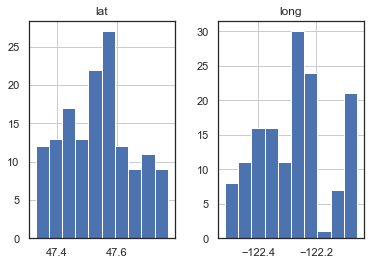

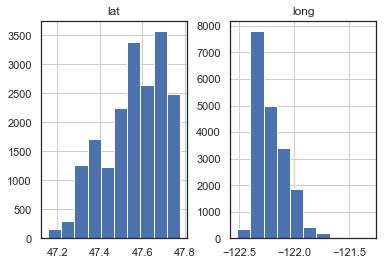

In [199]:
plot_yes_water = df.loc[df['waterfront'] == 1.0,['lat','long']].hist()
plot_no_water = df.loc[df['waterfront'] == 0,['lat','long']].hist()


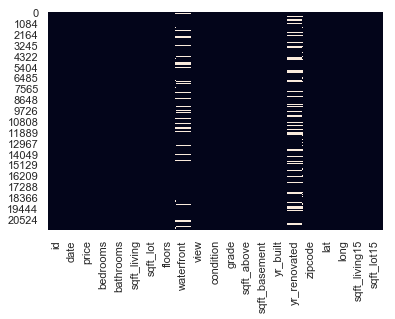

In [200]:
sns.heatmap(df.isnull(), cbar=False)

In [201]:
df.waterfront.fillna(0, inplace=True)


#### I decided to replace the NaN values  0 given that it was the majority of the data was without waterview. 

In [202]:
df.waterfront.value_counts()

0.0    21389
1.0      145
Name: waterfront, dtype: int64

In [203]:
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [204]:
# chekcing what is the percentage of the yr renovated na values 
3830/21597

0.17733944529332776

In [205]:
df.yr_renovated.unique()


array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [206]:
df[['price','yr_renovated']].corr()

,price,yr_renovated
price,1.000000,0.129887
yr_renovated,0.129887,1.000000


In [207]:
df.yr_renovated.median()

0.0

In [208]:
df.groupby(df['yr_renovated'])



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e3350b8>,
      dtype=object)

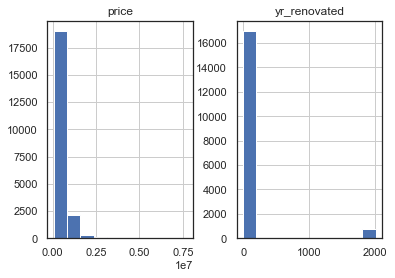

In [209]:
df[['price','yr_renovated']].hist()

In [210]:
# it seems that  a lot of the yr-renovated data has not been loged in propely as there are a lot of 0s ... 

df.drop(['yr_renovated'], axis =1, inplace=True)

In [211]:
# I didnt think the Column of year renovated was importat as it did not correlate much with what we are trying to prdict. 
# Therefore I decided to remove the yr renovated column . 

In [212]:
# I am additing two columns by extracting  date and month and place them in a separte column in order to check for any specific seasonality trends.

In [213]:
def extract_date(df,column):
    df[column+"year"] = df[column].apply(lambda x: x.year)
    df[column+"_month"] = df[column].apply(lambda x: x.month)
    

In [214]:
extract_date(df,'date')

In [215]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0,1955,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400,1951,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0.0,0.0,...,770,0,1933,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910,1965,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0,1987,98074,47.6168,-122.045,1800,7503,2015,2


In [216]:
#Dounble checking that our data is clean now and we can move on to the next step to explore the data. 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 22 columns):
id               21534 non-null int64
date             21534 non-null datetime64[ns]
price            21534 non-null int64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dateyear         21534 non-null int64
date_month       21534 non-null int64
dtypes: datetime64[ns](1), float6

In [217]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dateyear         0
date_month       0
dtype: int64

In [218]:
# I have noticed that the sqft.basement is object which is due to the space holder '?' I will replace it with NaN and then drop the NaN

In [219]:
df.sqft_basement.replace('?', np.NaN, inplace = True)


In [220]:
df.dropna(subset=['sqft_basement'],inplace =True)

In [221]:

# I am checking to make sure that '?' was removed.
df.sqft_basement.unique()

array(['0', '400', '910', '1530', '730', '1700', '300', '970', '760',
       '720', '700', '820', '780', '790', '330', '1620', '360', '588',
       '1510', '410', '990', '600', '560', '550', '1000', '1600', '500',
       '1040', '880', '1010', '240', '265', '290', '800', '540', '840',
       '380', '770', '480', '570', '1490', '620', '1250', '1270', '120',
       '650', '180', '1130', '450', '1640', '1460', '1020', '1030', '750',
       '640', '1070', '490', '1310', '630', '2000', '390', '430', '210',
       '1430', '1950', '440', '220', '1160', '860', '580', '2060', '1820',
       '1180', '200', '1150', '1200', '680', '530', '1450', '1170',
       '1080', '960', '280', '870', '1100', '460', '1400', '660', '1220',
       '900', '420', '1580', '1380', '475', '690', '270', '350', '935',
       '710', '1370', '980', '850', '1470', '160', '950', '50', '740',
       '1780', '1900', '340', '470', '370', '140', '1760', '130', '520',
       '890', '1110', '150', '1720', '810', '190', '1290', '

In [222]:
df.dropna(subset=['bedrooms'],inplace =True)

In [223]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
count,2.108200e+04,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,2014.323024,6.576131
std,2.876423e+09,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580,0.467643,3.114213
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,2014.000000,6.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [224]:
# The table above presents the importabt statistics for all the numerical columns in KC_House Data . 
# There are some categorical variables as continuous digit such as waterfront XXXXXX 
# I won't be looking into the mean/STD 
# The maximum square feet is 13,450 and the minimum is 290 which sugeests a wide disyrubted data.
# In the bedroom column max number is 33 and this seems to be an outlier or perhaps even a plaec holder ... we will remove that data poing below

##### Removing 33 bedrooms as it is an outlier 

In [225]:
df['bedrooms'] = df['bedrooms'].drop(df['bedrooms'].idxmax())
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,dateyear,date_month
count,2.108200e+04,2.108200e+04,21081.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,4.582793e+09,5.402469e+05,3.370998,2.115916,2080.359975,1.507759e+04,1.49362,0.006688,0.233327,3.409828,7.657717,1789.000000,1971.023337,98077.858837,47.560371,-122.213843,1986.917418,12732.514135,2014.323024,6.576131
std,2.876423e+09,3.667323e+05,0.902228,0.768142,917.856396,4.117338e+04,0.53937,0.081509,0.765066,0.650597,1.173690,828.369355,29.323120,53.528769,0.138568,0.140607,685.544250,27148.781580,0.467643,3.114213
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,2.123700e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,0.000000,0.000000,3.000000,7.000000,1200.000000,1952.000000,98033.000000,47.471325,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,3.904970e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,98065.000000,47.572200,-122.230000,1840.000000,7626.000000,2014.000000,6.000000
75%,7.312200e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10088.750000,2015.000000,9.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.50000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


In [241]:
view	condition	grade	sqft_above	yr_built	zipcode	lat	long	sqft_living15	sqft_lot15	dateyear	date_month


SyntaxError: invalid syntax (<ipython-input-241-0649f0f91ad2>, line 1)

In [243]:
df.waterfront.describe() 

count     21082
unique        2
top         0.0
freq      20941
Name: waterfront, dtype: object

In [240]:
df.waterfront.unique()

array(['0.0', '1.0'], dtype=object)

In [ ]:
print(data["origin"].nunique())

In [ ]:
view

In [ ]:
condition 

In [ ]:
grade

In [ ]:
yr_built

In [ ]:
zipcode

In [ ]:
date_month

## Exploring 

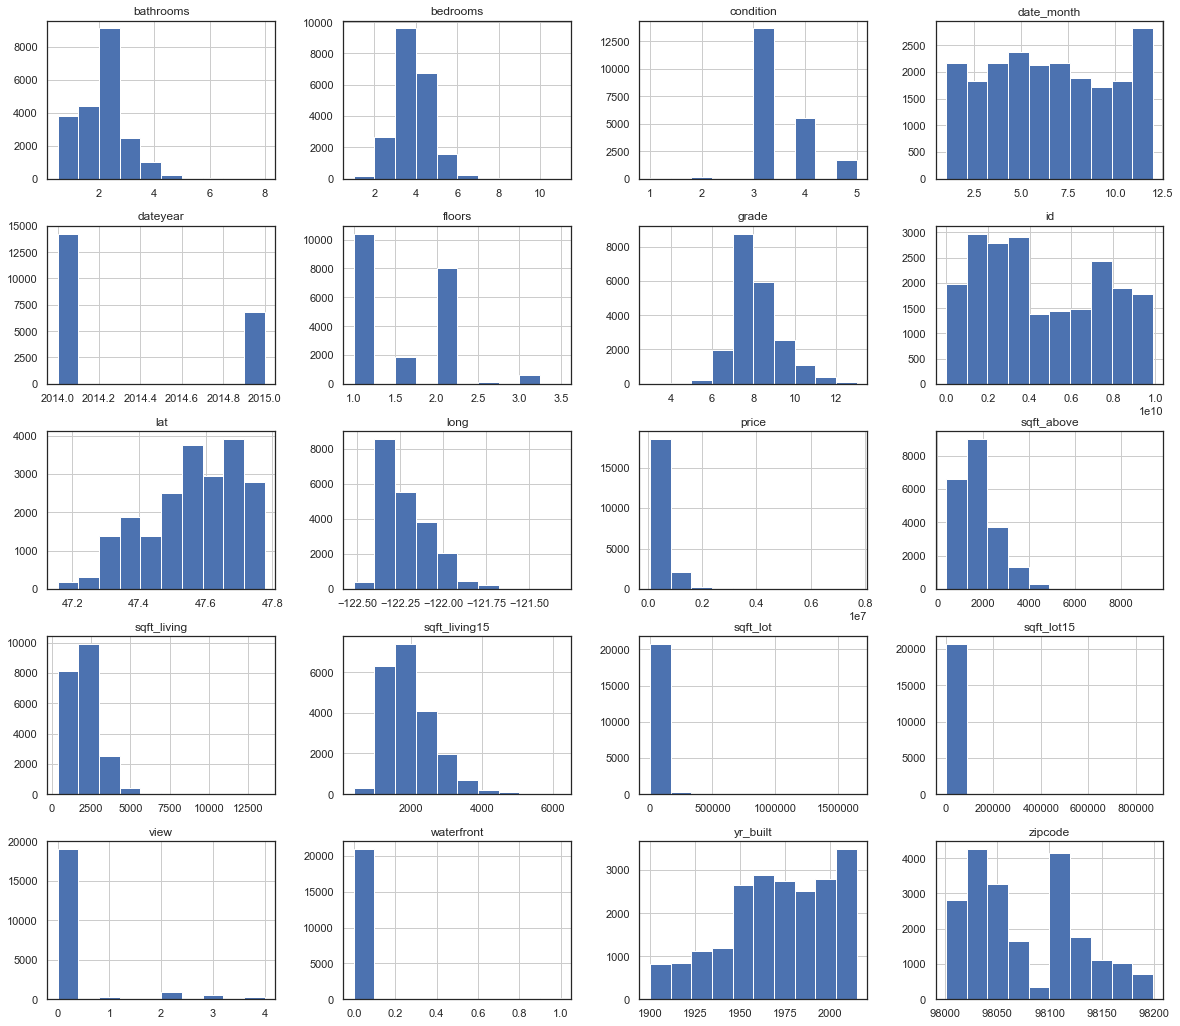

In [226]:
df.hist(figsize = (20,18));

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


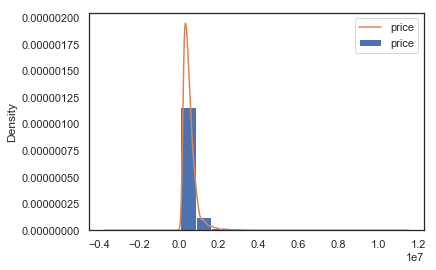

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


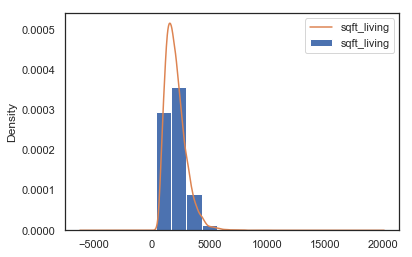

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


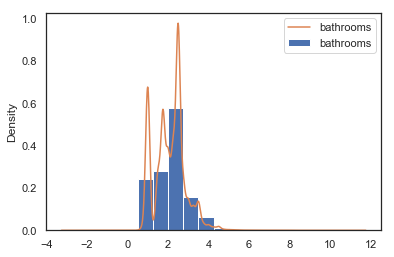

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


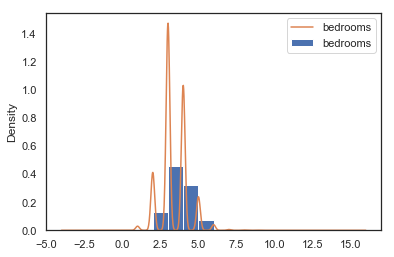

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


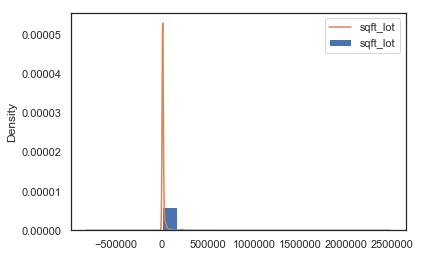

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


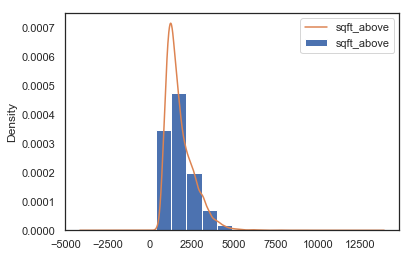

In [227]:
for column in ['price', 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_above']:
    df[column].plot.hist(normed=True)
    df[column].plot.kde(label=column)
    plt.legend()
    plt.show()
    

/Users/nataliagoncharov/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


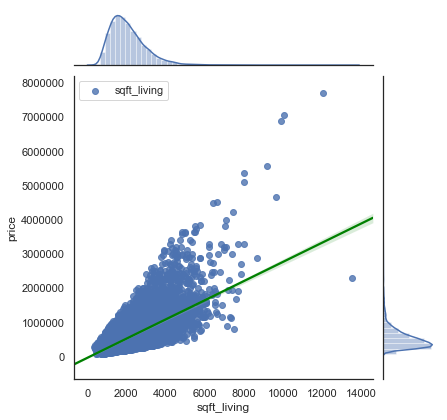

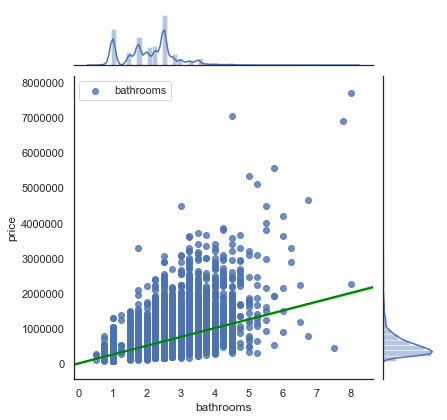

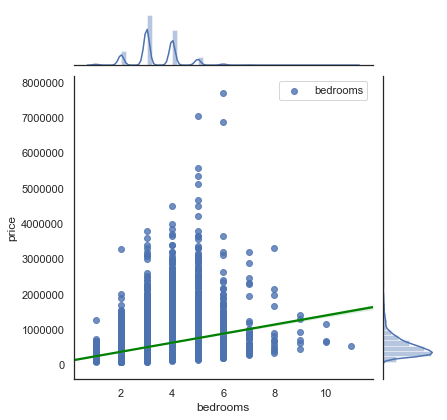

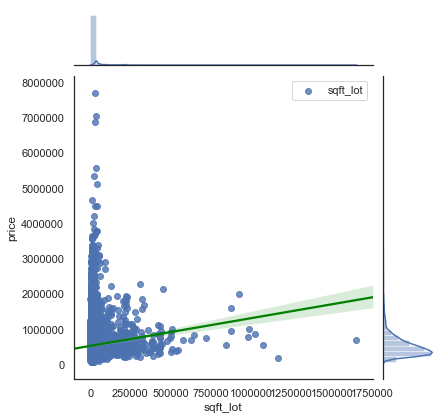

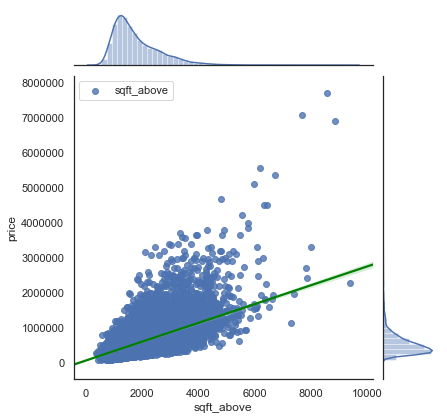

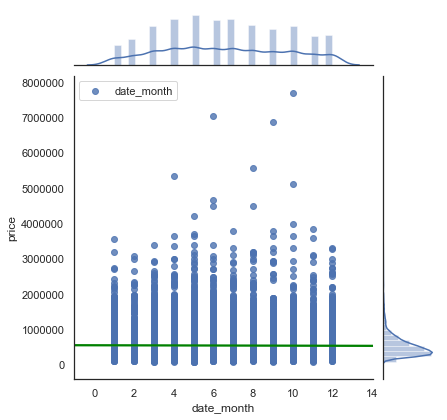

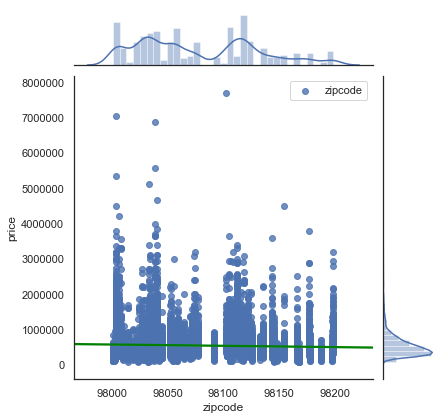

In [228]:
for column in [ 'sqft_living', 'bathrooms', 'bedrooms', 'sqft_lot', 'sqft_above', 'date_month', 'zipcode']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
#     sns.regplot(df[column], df.Weekly_Sales, label=column)
    plt.legend()
    plt.show()

Text(0,0.5,'Count')

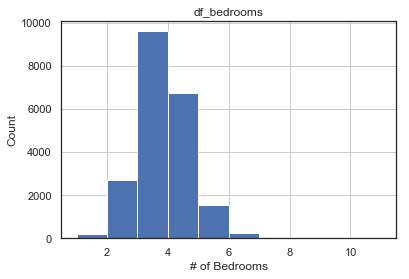

In [229]:
# I would like to look closely on the bedroom variables 

df.bedrooms.hist()
plt.title('df_bedrooms')
plt.xlabel('# of Bedrooms')
plt.ylabel('Count')

In [230]:
## I checked to see that these are infact all categirical values

In [231]:
df.condition.unique()


array([3, 5, 4, 1, 2])

In [232]:
df.grade.unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [233]:
df.date_month.unique()

array([10, 12,  2,  5,  4,  3,  1,  7,  8, 11,  6,  9])

In [234]:
df.waterfront = df.waterfront.astype("str")
df.view = df.view.astype("str")
df.grade = df.grade.astype("str")
df.zipcode = df.zipcode.astype("int64")
df.date_month = df.date_month.astype("str")
df.dateyear = df.dateyear.astype("str")



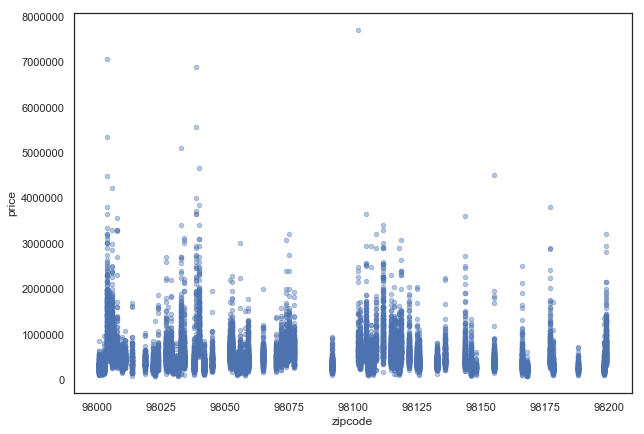

In [235]:
# I would like to visualize where the houses are places in terms of their zipcode ... is there a zip code with prices are higher? 

df.plot(kind="scatter", x="zipcode", y="price", alpha=0.4, figsize=(10,7))
plt.savefig('map2.png')

## Normalizing some of the data 

In [236]:
# get the index of all positive pledges (Box-Cox only takes postive values)

# get only positive pledges (using their indexes)
positive_pledges = df.usd_pledged_real.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]

# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])

ax[0].set_title("Original Data")

sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

AttributeError: 'DataFrame' object has no attribute 'usd_pledged_real'

In [ ]:
np.log(df["sqft_lot"]).describe()


In [ ]:
### We dont have negative values - we can perfrom normalization on the data

df_sqft_lot_log= df['sqft_lot']

df_sqft_lot_log= np.log(df_sqft_lot_log)


In [ ]:
df_sqft_lot_log.plot.hist(normed=True)
df_sqft_lot_log.plot.kde(label=column)
plt.legend()
plt.show()


In [ ]:
df_SL = df['sqft_living']

In [ ]:
df['df_sqft_lot_log'] = df_sqft_lot_log

In [ ]:
# I will keep the normelized data and remove the orignial data 
df.drop([ 'sqft_lot'], axis =1, inplace=True)

In [ ]:
sns.set(style="white")


corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
# Now I will check for Multicollinearity

df_pred= df.iloc[:,3:25]
df_pred.head()

In [ ]:
abs(df_pred.corr()) > 0.70

In [ ]:
import seaborn as sns
sns.heatmap(abs(df_pred.corr()) > 0.70, center=0);

In [ ]:
# According to high correlation in the above I will be removing(bedrooms, sqft_above,sqft_living15,sqft_lot15 ) as it highly correlated to sqft_living. This will avoid Multicollinearity.

In [ ]:
df.drop(['bathrooms', 'sqft_above','sqft_living15','sqft_lot15', 'date'], axis =1, inplace=True)

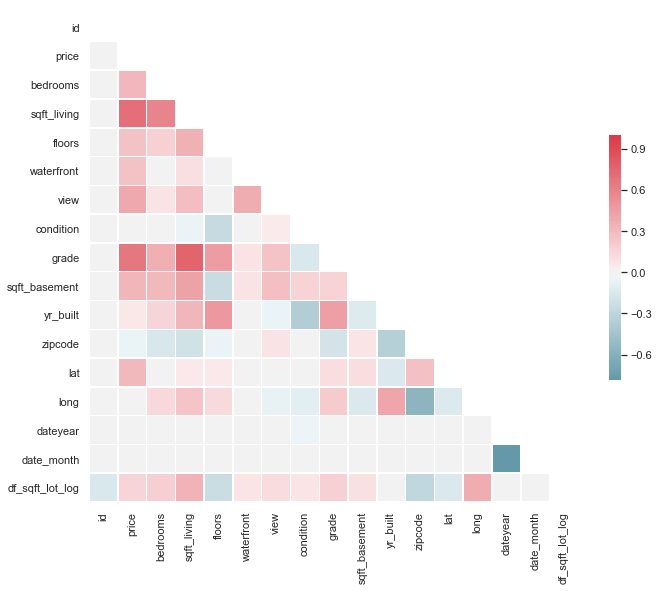

In [102]:
sns.set(style="white")


corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [152]:
# i am going to scale the data 

sqft_lot_log = df.df_sqft_lot_log
sqft_living = df.sqft_living 
sqft_basement = df.sqft_basement
floors = df.floors

scaled_sqft_living = (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))

scaled_sqft_lot_log = (df_sqft_lot_log-np.mean(df_sqft_lot_log))/np.sqrt(np.var(df_sqft_lot_log))

scaled_sqft_basement= (sqft_basement-np.mean(sqft_basement))/np.sqrt(np.var(sqft_basement))

scaled_floors = (floors-np.mean(floors))/np.sqrt(np.var(floors))

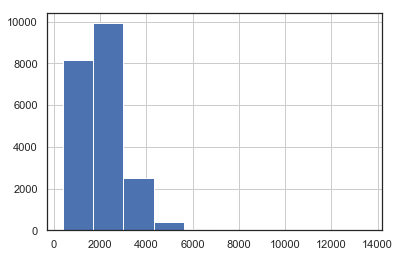

In [139]:
sqft_living.hist()


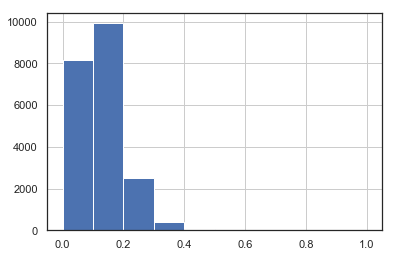

In [141]:
scaled_sqft_living.hist()

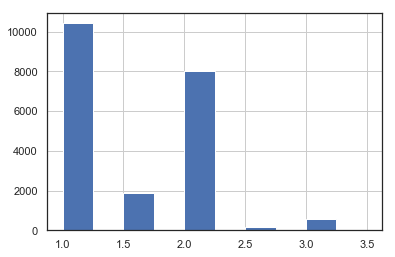

In [153]:
floors.hist()

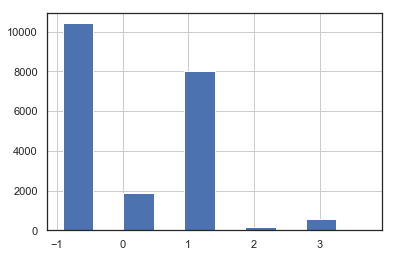

In [154]:
scaled_floors.hist()

In [168]:
df['scaled_sqft_living'] = scaled_sqft_living
df['scaled_sqft_lot_log'] = scaled_sqft_lot_log
df['scaled_sqft_basement'] = scaled_sqft_basement
df['scaled_floors'] = scaled_floors




# Model Data

In [170]:
df.drop(['date'], axis =1, inplace=True)

KeyError: "['date'] not found in axis"

In [180]:
X = df[["bedrooms","scaled_sqft_living", "waterfront","condition","view","grade","scaled_sqft_basement","date_month","scaled_sqft_lot_log","lat","long"]]
y = df["price"]

In [181]:
import statsmodels.api as sm
X_int = sm.add_constant(X)
model = sm.OLS(y,X_int).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     3967.
Date:                Wed, 19 Jun 2019   Prob (F-statistic):               0.00
Time:                        16:33:26   Log-Likelihood:            -2.8818e+05
No. Observations:               21081   AIC:                         5.764e+05
Df Residuals:                   21069   BIC:                         5.765e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.845e+07   1.49e+06    -39.275      0.000   -6.14e+07   -5.55e+07
bedrooms             -3.352e+04   2033.953    -16.478      0.000   -3.75e+04   -2.95e+04
scaled_sqft_living     2.81e+06    4.4e+04     63.839      0.000    2.72e+06     2.9e+06
waterfront            6.089e+05   1.92e+04     31.765      0.000    5.71e+05    6.46e+05
condition             5.703e+04   2311.841     24.670      0.000    5.25e+04    6.16e+04
view                  6.388e+04   2187.221     29.205      0.000    5.96e+04    6.82e+04
grade                 8.119e+04   2060.535     39.401      0.000    7.71e+04    8.52e+04
scaled_sqft_basement -1.058e+04   1802.019     -5.873      0.000   -1.41e+04   -7051.457
date_month           -3062.9777    463.272     -6.612      0.000   -3971.026   -2154.929
scaled_sqft_lot_log  -6269.1885   1672.380     -3.749      0.000   -9547.182   -2991.195
lat                   6.366e+05   1.08e+04     59.098      0.000    6.15e+05    6.58e+05
long                 -2.263e+05   1.18e+04    -19.165      0.000   -2.49e+05   -2.03e+05
==============================================================================
Omnibus:                    17441.307   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1508520.120
Skew:                           3.458   Prob(JB):                         0.00
Kurtosis:                      43.860   Cond. No.                     1.36e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [184]:
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [187]:
linreg.coef_

array([ -33515.37700161, 2809979.68799135,  608902.03346208,
         57032.81486186,   63878.51366209,   81188.17383054,
        -10583.5518842 ,   -3062.97767015,   -6269.18853953,
        636574.80258463, -226262.8432169 ])

In [188]:
linreg.intercept_


-58454910.107476085